<a href="https://colab.research.google.com/github/hlee2501/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [7]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-10-30 22:12:24--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.177.61
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.177.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’

instacart_online_gr 100%[===================>] 196.03M  93.8MB/s    in 2.1s    

2019-10-30 22:12:27 (93.8 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’ saved [205548478/205548478]



In [8]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [9]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [10]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
##### YOUR CODE HERE #####
import pandas as pd

In [0]:
products = pd.read_csv('products.csv')

In [13]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
# columns needed from order_products_prior and order_products_train: order_id,
# product_id, add_to_cart_order
# columns needed from products: product_name, product_id
order_prior = pd.read_csv('order_products__prior.csv')
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
order_train = pd.read_csv('order_products__train.csv')
order_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [10]:
order_total = pd.concat([order_prior, order_train])
order_total.shape

(33819106, 4)

In [22]:
condition = ((products['product_name'] == 'Banana') | 
  (products['product_name'] == 'Bag of Organic Bananas') |
  (products['product_name'] == 'Organic Strawberries') |
  (products['product_name'] == 'Organic Baby Spinach') |
  (products['product_name'] == 'Organic Hass Avocado') |
  (products['product_name'] == 'Organic Avocado') |
  (products['product_name'] == 'Large Lemon') |
  (products['product_name'] == 'Strawberries') |
  (products['product_name'] == 'Limes') |
  (products['product_name'] == 'Organic Whole Milk'))
products_top_ten = products[condition]
products_top_ten.head()

,product_id,product_name,aisle_id,department_id
13175,13176,Bag of Organic Bananas,24,4
16796,16797,Strawberries,24,4
21136,21137,Organic Strawberries,24,4
21902,21903,Organic Baby Spinach,123,4
24851,24852,Banana,24,4


In [0]:
#merged = pd.merge(order_total, products[['product_name', 'product_id']], how='left', on='product_id')
merged = pd.merge(order_total, products_top_ten[['product_name', 'product_id']], on='product_id')

In [31]:
merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name
0,3,21903,4,1,Organic Baby Spinach
1,26,21903,6,0,Organic Baby Spinach
2,31,21903,3,1,Organic Baby Spinach
3,39,21903,4,0,Organic Baby Spinach
4,56,21903,8,1,Organic Baby Spinach


In [32]:
merged['product_name'].value_counts()

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: product_name, dtype: int64

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
import seaborn as sns
flights = sns.load_dataset('flights')

In [35]:
##### YOUR CODE HERE #####
aisles = pd.read_csv('aisles.csv')
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [36]:
departments = pd.read_csv('departments.csv')
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [37]:
print(order_prior.shape)
order_prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [38]:
print(order_train.shape)
order_train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [39]:
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [40]:
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [45]:
order_products = pd.concat([order_prior, order_train])
print(order_products.shape)
order_products.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [42]:
orders['user_id'] == 1

0           True
1           True
2           True
3           True
4           True
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Name: user_id, Length: 3421083, dtype: bool

In [43]:
orders['order_number'] <= 2
condition = (orders['user_id'] == 1) & (orders['order_number']<=2)
columns =['user_id','order_id','order_number','order_dow','order_hour_of_day']
orders_subset = orders.loc[condition,columns]
orders_subset.head()

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7


In [46]:
condition = ((order_products['order_id'] == 2539329) |
             (order_products['order_id'] == 2398795))
columns = ['order_id','product_id','add_to_cart_order']
order_products_subset = order_products.loc[condition,columns]
order_products_subset.head(11)

,order_id,product_id,add_to_cart_order
22742744,2398795,196,1
22742745,2398795,10258,2
22742746,2398795,12427,3
22742747,2398795,13176,4
22742748,2398795,26088,5
22742749,2398795,13032,6
24076664,2539329,196,1
24076665,2539329,14084,2
24076666,2539329,12427,3
24076667,2539329,26088,4


In [47]:
merged = pd.merge(orders_subset,
                  order_products_subset,
                  how='inner',
                  on='order_id')
merged.head(11)

,user_id,order_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order
0,1,2539329,1,2,8,196,1
1,1,2539329,1,2,8,14084,2
2,1,2539329,1,2,8,12427,3
3,1,2539329,1,2,8,26088,4
4,1,2539329,1,2,8,26405,5
5,1,2398795,2,3,7,196,1
6,1,2398795,2,3,7,10258,2
7,1,2398795,2,3,7,12427,3
8,1,2398795,2,3,7,13176,4
9,1,2398795,2,3,7,26088,5


In [48]:
final = pd.merge(merged,
                 products[['product_id','product_name']],
                 how='left',
                 on='product_id')
final.head(500)

,user_id,order_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order,product_name
0,1,2539329,1,2,8,196,1,Soda
1,1,2539329,1,2,8,14084,2,Organic Unsweetened Vanilla Almond Milk
2,1,2539329,1,2,8,12427,3,Original Beef Jerky
3,1,2539329,1,2,8,26088,4,Aged White Cheddar Popcorn
4,1,2539329,1,2,8,26405,5,XL Pick-A-Size Paper Towel Rolls
5,1,2398795,2,3,7,196,1,Soda
6,1,2398795,2,3,7,10258,2,Pistachios
7,1,2398795,2,3,7,12427,3,Original Beef Jerky
8,1,2398795,2,3,7,13176,4,Bag of Organic Bananas
9,1,2398795,2,3,7,26088,5,Aged White Cheddar Popcorn


In [49]:
final = final.sort_values(by=['order_number','add_to_cart_order'])
final

,user_id,order_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order,product_name
0,1,2539329,1,2,8,196,1,Soda
1,1,2539329,1,2,8,14084,2,Organic Unsweetened Vanilla Almond Milk
2,1,2539329,1,2,8,12427,3,Original Beef Jerky
3,1,2539329,1,2,8,26088,4,Aged White Cheddar Popcorn
4,1,2539329,1,2,8,26405,5,XL Pick-A-Size Paper Towel Rolls
5,1,2398795,2,3,7,196,1,Soda
6,1,2398795,2,3,7,10258,2,Pistachios
7,1,2398795,2,3,7,12427,3,Original Beef Jerky
8,1,2398795,2,3,7,13176,4,Bag of Organic Bananas
9,1,2398795,2,3,7,26088,5,Aged White Cheddar Popcorn


In [50]:
final.columns = [column.replace('_',' ') for column in final]
final.head(11)

,user id,order id,order number,order dow,order hour of day,product id,add to cart order,product name
0,1,2539329,1,2,8,196,1,Soda
1,1,2539329,1,2,8,14084,2,Organic Unsweetened Vanilla Almond Milk
2,1,2539329,1,2,8,12427,3,Original Beef Jerky
3,1,2539329,1,2,8,26088,4,Aged White Cheddar Popcorn
4,1,2539329,1,2,8,26405,5,XL Pick-A-Size Paper Towel Rolls
5,1,2398795,2,3,7,196,1,Soda
6,1,2398795,2,3,7,10258,2,Pistachios
7,1,2398795,2,3,7,12427,3,Original Beef Jerky
8,1,2398795,2,3,7,13176,4,Bag of Organic Bananas
9,1,2398795,2,3,7,26088,5,Aged White Cheddar Popcorn


In [0]:
%matplotlib inline
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

In [53]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [54]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [55]:
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [56]:
tidy1 = table1.melt(id_vars='index',value_vars=['treatmenta','treatmentb'])
tidy1

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [57]:
tidy1 = tidy1.rename(columns={
    'index':'name',
    'variable':'trt',
    'value':'result'
})
tidy1

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [58]:
tidy1.trt = tidy1.trt.str.replace('treatment', '')
tidy1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [0]:
table2 = table2.reset_index()

In [65]:
tidy2 = table2.melt(id_vars='index',value_vars=['John Smith','Jane Doe','Mary Johnson'])
tidy2

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [61]:
wide = tidy1.pivot_table(index='name',columns='trt',values='result')
wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [67]:
wide2 = tidy2.pivot_table(index='index',columns='variable',values='value')
wide2

variable,Jane Doe,John Smith,Mary Johnson
index,,,
treatmenta,16.0,NaN,3.0
treatmentb,11.0,2.0,1.0


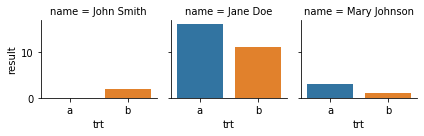

In [69]:
sns.catplot(x='trt',y='result',col='name',
            kind='bar',data=tidy1,height=2);

In [0]:
products = pd.read_csv('products.csv')
order_products = pd.concat([pd.read_csv('order_products__prior.csv'),
                            pd.read_csv('order_products__train.csv')])
orders = pd.read_csv('orders.csv')

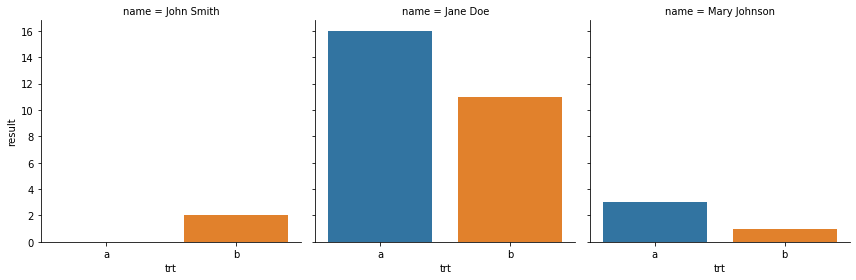

In [71]:
sns.catplot(x='trt',y='result',col='name',
            kind='bar',data=tidy1,height=4)

In [12]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']
products.columns.to_list()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [13]:
orders.columns.to_list()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [14]:
order_products.columns.to_list()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [15]:
merged = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))

merged.head()

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


In [16]:
condition = ((merged['product_name']=='Half Baked Frozen Yogurt') | 
             (merged['product_name']=='Half And Half Ultra Pasteurized'))

merged = merged[condition]

print(merged.shape)
merged.head()

(5978, 4)


,product_id,product_name,order_id,order_hour_of_day
25086,30668,Half Baked Frozen Yogurt,595220,21
29409,30668,Half Baked Frozen Yogurt,3252348,16
33914,30668,Half Baked Frozen Yogurt,677455,17
34412,30668,Half Baked Frozen Yogurt,1821824,14
35652,30668,Half Baked Frozen Yogurt,1225489,17


In [17]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

condition = merged['product_name'].isin(product_names)

subset = merged[condition]

print(subset.shape)
subset.head()

(5978, 4)


,product_id,product_name,order_id,order_hour_of_day
25086,30668,Half Baked Frozen Yogurt,595220,21
29409,30668,Half Baked Frozen Yogurt,3252348,16
33914,30668,Half Baked Frozen Yogurt,677455,17
34412,30668,Half Baked Frozen Yogurt,1821824,14
35652,30668,Half Baked Frozen Yogurt,1225489,17


In [0]:
froyo = subset[subset['product_name']=='Half Baked Frozen Yogurt']
cream = subset[subset['product_name']=='Half And Half Ultra Pasteurized']

In [19]:
cream['order_hour_of_day'].value_counts(normalize=True).sort_index()

0     0.002003
1     0.000334
2     0.000334
4     0.000334
5     0.001336
6     0.008347
7     0.031720
8     0.107846
9     0.160267
10    0.143239
11    0.097496
12    0.066778
13    0.071119
14    0.071786
15    0.074124
16    0.072788
17    0.037062
18    0.018698
19    0.009349
20    0.010684
21    0.007679
22    0.004007
23    0.002671
Name: order_hour_of_day, dtype: float64

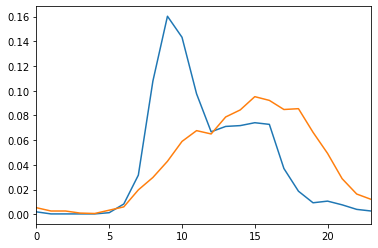

In [20]:
(cream['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot())

(froyo['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot());

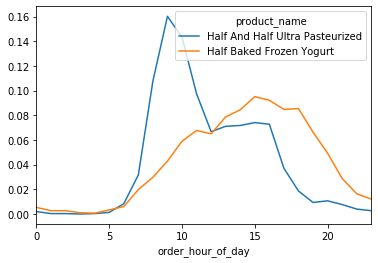

In [21]:
pd.crosstab(subset['order_hour_of_day'], 
            subset['product_name'], 
            normalize='columns').plot();

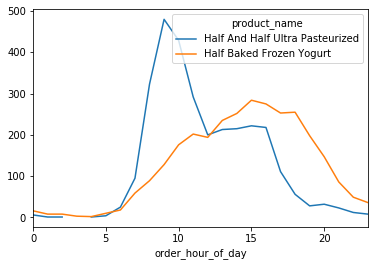

In [22]:
subset.pivot_table(index='order_hour_of_day', 
                   columns='product_name', 
                   values='order_id', 
                   aggfunc=len).plot();

In [23]:
table = pd.crosstab(subset['order_hour_of_day'], 
                    subset['product_name'], 
                    normalize=True)

table

product_name,Half And Half Ultra Pasteurized,Half Baked Frozen Yogurt
order_hour_of_day,,
0,0.001004,0.002676
1,0.000167,0.001338
2,0.000167,0.001338
3,0.000000,0.000502
4,0.000167,0.000335
5,0.000669,0.001673
6,0.004182,0.003011
7,0.015892,0.009870
8,0.054031,0.014888


In [24]:
melted = table.reset_index().melt(id_vars='order_hour_of_day').rename(columns={
     'order_hour_of_day': 'Hour of Day Ordered', 
     'product_name': 'Product', 
     'value': 'Percent of Orders by Product'
 })

melted

,Hour of Day Ordered,Product,Percent of Orders by Product
0,0,Half And Half Ultra Pasteurized,0.001004
1,1,Half And Half Ultra Pasteurized,0.000167
2,2,Half And Half Ultra Pasteurized,0.000167
3,3,Half And Half Ultra Pasteurized,0.000000
4,4,Half And Half Ultra Pasteurized,0.000167
5,5,Half And Half Ultra Pasteurized,0.000669
6,6,Half And Half Ultra Pasteurized,0.004182
7,7,Half And Half Ultra Pasteurized,0.015892
8,8,Half And Half Ultra Pasteurized,0.054031
9,9,Half And Half Ultra Pasteurized,0.080294


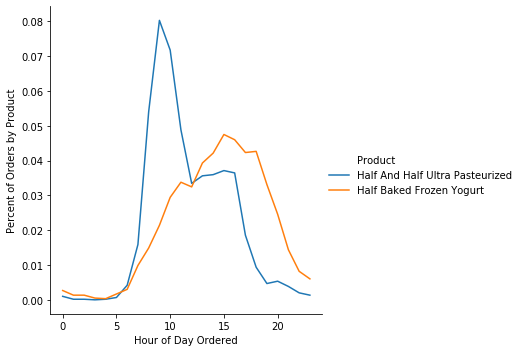

In [25]:
sns.relplot(x='Hour of Day Ordered', 
            y='Percent of Orders by Product', 
            hue='Product', 
            data=melted, 
            kind='line');

In [26]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


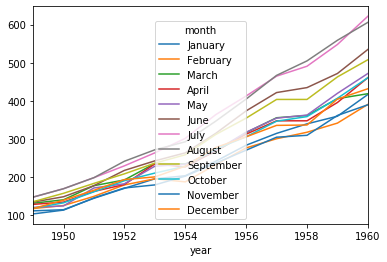

In [30]:
flights.pivot_table(index='year',
                   columns='month',
                   values='passengers').plot();

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####